# MultiNest sampling

This example demonstrates how to use MultiNest sampling [1] to sample from the posterior distribution for a logistic model fitted to model-simulated data.

[1] "MultiNest: an efficient and robust Bayesian inference tool for cosmology and particle physics."
Feroz, F., M. P. Hobson, and M. Bridges. Monthly Notices of the Royal Astronomical Society 398.4 (2009): 1601-1614.

First create fake data.

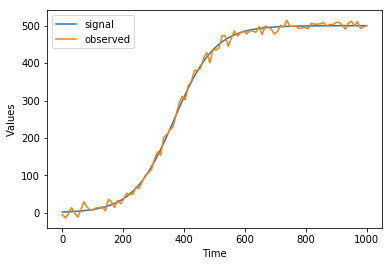

In [1]:
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt


# below implicitly assumes the following priors
# log_prior = pints.UniformLogPrior(
#     [0.01, 400, sigma * 0.5],
#     [0.02, 600, sigma * 1.5])
class ExampleModel(pints.ForwardModel):
    
    def simulate(self, parameters, times):
        # Run a simulation with the given parameters for the
        # given times and return the simulated values
        params_transformed = np.copy(parameters)
        params_transformed[0] = (params_transformed[0] * 0.5 + 0.5) / 50
        params_transformed[1] = (params_transformed[1] * 200 + 400)
        return toy.LogisticModel().simulate(params_transformed, times) 
    
    def n_parameters(self):
        # Return the dimension of the parameter vector
        return 2

# Load a forward model
model = ExampleModel()

# Create some toy data
r = 0.5
k = 0.5
real_parameters = [r, k]
times = np.linspace(0, 1000, 100)
signal_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
sigma = 10
observed_values = signal_values + pints.noise.independent(sigma, signal_values.shape)

# Plot
plt.plot(times,signal_values,label = 'signal')
plt.plot(times,observed_values,label = 'observed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

Create the nested sampler that will be used to sample from the posterior.

In [2]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, observed_values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.GaussianKnownSigmaLogLikelihood(problem, 10)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.0, 0.0],
    [1.0, 1.0])

# Create a nested ellipsoidal rejectection sampler
sampler = pints.NestedController(log_likelihood, log_prior, method=pints.MultinestSampler)

# Set number of iterations
sampler.set_iterations(8000)

# Set the number of posterior samples to generate
sampler.set_n_posterior_samples(1600)

sampler._sampler.set_f_s_threshold(1.3)

Run the sampler!

In [3]:
samples = sampler.run()
print('Done!')

Running Nested ellipsoidal sampler
Number of active points: 400
Total number of iterations: 8000
Total number of posterior samples: 1600
Iter. Eval. Time m:s Delta_log(z) Acceptance rate
0     1       0:00.0 -inf          1             
0     2       0:00.0 -inf          1             
0     21      0:00.0 -inf          1             
0     41      0:00.0 -inf          1             
0     61      0:00.0 -inf          1             
0     81      0:00.0 -inf          1             
0     101     0:00.0 -inf          1             
0     121     0:00.0 -inf          1             
0     141     0:00.0 -inf          1             
0     161     0:00.0 -inf          1             
0     181     0:00.0 -inf          1             
0     201     0:00.0 -inf          1             
0     221     0:00.0 -inf          1             
0     241     0:00.0 -inf          1             
0     261     0:00.0 -inf          1             
0     281     0:00.0 -inf          1             
0     301    

1
1.3306284813343268
[array([[10.94038958,  3.41068133],
       [ 3.41068133,  5.75813132]])]
[array([0.52307148, 0.48556575])]
1
1.3267952450248532
[array([[10.90807914,  3.37027292],
       [ 3.37027292,  5.76805873]])]
[array([0.52325172, 0.48383753])]
1
1.3275825958773537
[array([[10.96996715,  3.4226609 ],
       [ 3.4226609 ,  5.82458093]])]
[array([0.52365866, 0.48486295])]
1
1.3229605479347597
[array([[10.96803402,  3.42620933],
       [ 3.42620933,  5.83850389]])]
[array([0.52358994, 0.48500663])]
1
1.3214780317980903
[array([[10.96803402,  3.42620933],
       [ 3.42620933,  5.83850389]])]
[array([0.52358994, 0.48500663])]
1
1.324785859939936
[array([[10.98356088,  3.4109907 ],
       [ 3.4109907 ,  5.87654732]])]
[array([0.52424098, 0.48391446])]
1
1.3203917022896792
[array([[10.98459868,  3.39117648],
       [ 3.39117648,  5.80945697]])]
[array([0.52337241, 0.48425485])]
1
1.3278928089130333
[array([[10.98459868,  3.39117648],
       [ 3.39117648,  5.80945697]])]
[array([0.5

[array([[81.01812255, 21.72481382],
       [21.72481382, 48.6012309 ]])]
[array([0.50803779, 0.50119071])]
1
1240  1883    0:23.9 -197.8634756  0.836142953   
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1260  1905    0:24.0 -183.6479618  0.837209302   
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1.3026589082279918
[array([[96.56434546, 23.39468738],
       [23.39468738, 55.33995781]])]
[array([0.50905648, 0.50089395])]
1
1
1280  1931    0:24.1 -174.8319651  0.836054866   
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1300  1951    0:24.1 -168.0743452  0.838168923   
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1320  1973    0:24.2 -157.4424169  0.839160839   
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1340  2001    0:24.2 -149.3464322  0.836976889   
1
1
1
1
1
1.3026533567791807
[array([[121.23802197,  29.82054605],
       [ 29.82054605,  65.60498759]])]
[array([0.50747527, 0.49780165])]
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1360  2025    0:24.4 -143.6333488  0.836923077   
1

[array([[1546.71593954,  378.05976803],
       [ 378.05976803,  883.32915834]])]
[array([0.50275623, 0.49760295])]
1
1
1
1
2380  3193    0:32.9 -13.58407163  0.852130326   
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
[array([[1707.22366895,  446.39395275],
       [ 446.39395275,  943.3004084 ]])]
[array([0.5025693 , 0.49753668])]
1
2400  3218    0:33.0 -12.86213562  0.85166785    
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2420  3241    0:33.1 -12.20497501  0.851812742   
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2440  3263    0:33.1 -11.58087949  0.852252882   
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2460  3285    0:33.2 -11.05141371  0.852686308   
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2480  3311    0:33.2 -10.57422772  0.851940914   
1.3031306479821534
[array([[2139.83743287,  543.72945182],
       [ 543.72945182, 1081.51449326]])]
[array([0.50277321, 0.49717583])]
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2500  3334    0:33.7 -10.06870767  0.852079072

[array([[32716.44278576,  8438.63558045],
       [ 8438.63558045, 16949.5848569 ]])]
[array([0.50173254, 0.49843755])]
1
1
1
1
3580  4572    0:40.4 -0.66639      0.85810163    
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
[array([[34056.94270099,  9452.78398803],
       [ 9452.78398803, 18313.08435607]])]
[array([0.5018175 , 0.49837331])]
1
[array([[34056.94270099,  9452.78398803],
       [ 9452.78398803, 18313.08435607]])]
[array([0.5018175 , 0.49837331])]
1
3600  4594    0:41.0 -0.630102     0.858369099   
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3620  4615    0:41.0 -0.597349     0.858837485172
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3640  4637    0:41.1 -0.564883     0.859098419   
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3660  4659    0:41.1 -0.534231     0.859356656   
1
1
1
1
1
1
1
1.3020831665598913
[array([[39224.1955696 ,  9639.76608421],
       [ 9639.76608421, 18683.77003973]])]
[array([0.50173104, 0.49836996])]
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3680  4680    0:41.5 -0.505331 

## Plot posterior samples versus true parameter values (dashed lines)

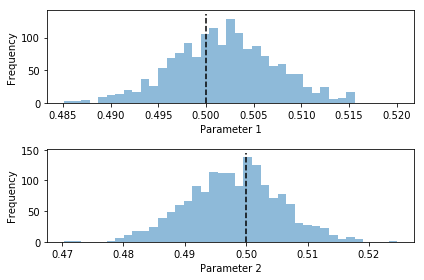

In [7]:
# Plot output
import pints.plot

pints.plot.histogram([samples], ref_parameters=[r, k])

plt.show()

## Plot posterior predictive simulations versus the observed data

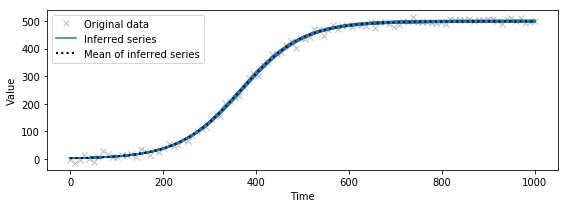

In [8]:
pints.plot.series(samples[:100], problem)
plt.show()

## Marginal likelihood estimate

In [9]:
print('marginal log-likelihood = ' + str(sampler.marginal_log_likelihood())
      + ' ± ' + str(sampler.marginal_log_likelihood_standard_deviation()))

marginal log-likelihood = -373.32404847331145 ± 0.07478927390316759


## Effective sample size

In [10]:
print('effective sample size = ' + str(sampler.effective_sample_size()))

effective sample size = 1330.0037780937987
